# Resubmission

The following sections were updated for resbumission. Changes are <span style="color:red">highlighted in red text.</span>

* Business Understanding
* Data Meaning Type
* Data Quality
* Simple Statistics
* Visualize Attributes
* Explore Joint Attributes

# Business Understanding


<span style="color:red">Examining and predicting cardiovascular disease helps to provide early intervention.  A dataset from Kaggle provides information about various patients taken during a medical examination.  This dataset was uploaded to the Kaggle website by Svetlana Ulianova, who appears to be a data science student at Ryerson University.  Ms. Ulianova did not provide a source, or exact purpose of the dataset.  Further, Ms. Ulianova did not sponsor a competition or add a description with the dataset.  Therefore, it is unclear why Ms. Ulianova uploaded the dataset, and </span>the provided cardiovascular dataset is <span style="color:red">assumed to be</span> available for academic purposes, aimed at classifying whether a patient may have cardiovascular disease.  

Stated differently, this data was collected and created to build and train models using a variety of predictors to classify a patient as having cardiovascular disease or not having cardiovascular disease.  <span style="color:red">The dataset includes 70,000 rows and 12 different features.  To examine and provide classification of the presence of cardiovascular disease, the analysis will examine relationships between each of the features using all of the rows by imputing, or otherwise values using a median or mean value for those that may be missing.  Specifically, the analysis aims to provide a prediction of whether a person has the presence or absence of cardiovascular disease, which is indicated by a column in the dataset titled “cardio.”  The “cardio” column is a binary, categorical variable.</span>

<span style="color:red">As stated above, </span>the outcomes of the cardiovascular dataset are defined as a classification problem using a categorical response variable. For example, to determine whether smoking is a predictor of cardiovascular disease and using accuracy statistics to measure the effectiveness of smoking as a predictor.  <span style="color:red">Therefore, the modeling problem is defined as a classification problem.  Again, an effective outcome may be measured using accuracy statistics.</span>
  If the model correctly predicts the presence of cardiovascular disease in a given a patient 70% of the time actions such as early, noninvasive, and safe intervention therapies (such as with diet and exercise), may replace necessary (surgical, and dangerous interventions) as an undiagnosed problem worsens. A low false-negative rate, that is incorrectly diagnosing a patient as not having cardiovascular disease may be a beneficial measure of having mined useful knowledge. Given the categorical response variable and classification of cardiovascular disease, the effectiveness of the prediction algorithm may be measured through accuracy or precision statistics, ROC curves or cross-validation (“CV”), for example a 10-fold CV.




#### Library Imports

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import plotly.express as px
%matplotlib inline

#### Load the CSV Data

In [2]:
df = pd.read_csv('../data/cardio_train.csv', delimiter=';')


# Data Meaning Type


The cardiovascular dataset consists of 11 features and 1 target variable. Attribute descriptions can be found on [Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). They are provided below.

There are 3 types of input features in the data set.
- **Objective**: factual information
- **Examination**:  results from a medical examination
- **Subjective**:  response provided by patient



**Table 1: Cardiovascular Dataset - Attribute Descriptions**

| Column Description | Feature Type | Column Name | Data Type |
|:---|:---|:---|:---|
| **Age**                        | Objective | age | int (days) |
| **Height**                     | Objective | height | int (cm) |
| **Weight**                     | Objective | weight | float (kg) |
| **Gender**                     | Objective | gender | 1: female, 2: male |
| **Systolic blood pressure**    | Examination | ap_hi | int |
| **Diastolic blood pressure**   | Examination | ap_lo | int |
| **Cholesterol**                | Examination | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| **Glucose**                    | Examination | gluc | 1: normal, 2: above normal, 3: well above normal |
| **Smoking**                    | Subjective | smoke | binary |
| **Alcohol intake**             | Subjective | alco | binary |
| **Physical activity**          | Subjective | active | binary |
| **Has CVD?**                   | Target | cardio | binary |

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


We decided to use the `id` column as the index as it appears to be a unique identifier for the subject.

In [4]:
df.set_index("id", inplace=True)

In [5]:
df.index.is_unique

True

<span style="color:red">Below we can use df.info to get a summary of features in the data frame. We have 11 features, 1 target (output) feature, and 70,000 observations.</span>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 9.4 MB


# Data Quality


## Identify Dimensions

In [7]:
df.shape

(70000, 12)

Our data set has `70 thousand` rows and `12` columns, which should work nicely for many of the machine learning classifiers we may attempt to utilize.

In [8]:
cols = df.columns

Store columns for later use.

In [9]:
cols

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## Missing Values



In [10]:
df.isna().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

There are no missing values in any of the columns of the default data.  But upon furhter inspection we found that zeros or other values may have been used in place of missing entries which should also be addressed.

## Duplicates


In [11]:
df.duplicated().any() 


True

There do appear to be <span style="color:red">duplicated</span> values.

In [12]:
df.duplicated().sum()

24

There were a total of 24 <span style="color:red">unique </span>sets where all columns of an observation equal at least one other record in the set. It was important to remove `id` as part of the data frame otherwise these duplicated entries would have been more difficult to detect.

In [13]:
duplicated = df[df.duplicated(keep=False)].sort_values(by=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'])

In [14]:
duplicated

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
9004,14552,1,158,64.0,120,80,1,1,0,0,1,0
57690,14552,1,158,64.0,120,80,1,1,0,0,1,0
24435,16160,1,168,65.0,120,80,1,1,0,0,1,1
91592,16160,1,168,65.0,120,80,1,1,0,0,1,1
1685,16793,1,165,68.0,120,80,1,1,0,0,1,0
31110,16793,1,165,68.0,120,80,1,1,0,0,1,0
40450,16805,1,157,67.0,120,80,1,1,0,0,1,0
86345,16805,1,157,67.0,120,80,1,1,0,0,1,0
14974,16937,2,170,70.0,120,80,1,1,0,0,0,0


In [15]:
df_clean = df.copy(deep=True)

In [16]:
df_clean.drop_duplicates(inplace=True)

We'll remove the duplicates entirely, as this should not affect the ability of our models to make predictions with the amount of observations at our disposal.  <span style="color:red">The reasoning behind this is that in the unlikely event that these rows are sampled in our training data, having duplicate values could bias our model and skew the results.</span>


## Transformations

In [17]:
# %%time
# df_clean['age'] = df_clean['age'].apply(lambda x: round(x / 365))
df_clean['age'] = (df_clean['age'] / 365).round().astype('int')

`Age` was provided in `days`, and for the sake of interpretability we'll be converting this to years for all observations.

In [18]:
df_clean["gender"].value_counts()

1    45509
2    24467
Name: gender, dtype: int64

In [19]:
df_clean["smoke"].value_counts()

0    63807
1     6169
Name: smoke, dtype: int64

In [20]:
df_clean["alco"].value_counts()

0    66212
1     3764
Name: alco, dtype: int64

In [21]:
df_clean["active"].value_counts()

1    56241
0    13735
Name: active, dtype: int64

In [22]:
df_clean["cardio"].value_counts()

0    35004
1    34972
Name: cardio, dtype: int64

In [23]:
# df_clean['gender'] = np.where((df_clean.gender == 2), True, False)
# df_clean['smoke'] = np.where((df_clean.smoke == 1), True, False)
# df_clean['alco'] = np.where((df_clean.alco == 1), True, False)
# df_clean['active'] = np.where((df_clean.active == 1), True, False)
# df_clean['cardio'] = np.where((df_clean.cardio == 1), True, False)

<span style="color:red">In order to reduce confusion as to what the binary variables represent, we will be encoding them with the boolean values of `True` and `False` and changing the labels within our graphs so that it is clear to the reader what these represent.  In the case of gender, 1 and 2, leaving them as numeric could imply an ordering which may be detrimental to model fitting with some classifiers.  It should be noted, that our accuracy metrics were unaffected by this encoding, but using this technique certainly makes definitions more interpretable.</span>

## Imputation

#### Age

In [24]:
median_age = df_clean['age'].median()

In [25]:
age_outlier_ids = df_clean.index[(np.abs(df_clean['age'] - df_clean['age'].mean()) > (3 * df_clean['age'].std()))]

In [26]:
df_clean.loc[df_clean.index.isin(age_outlier_ids), "age"] = median_age

In [27]:
df_clean.loc[df_clean.index.isin(age_outlier_ids)].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
8850,54.0,1,175,59.0,120,80,1,1,0,0,1,0
31922,54.0,2,175,92.0,100,60,1,1,0,0,1,0
43842,54.0,1,159,59.0,120,80,1,1,0,0,1,0
79749,54.0,1,160,59.0,110,70,1,1,0,0,1,0


We've imputed observations with an `age` of more than `three standard deviations` from the mean with the median value. (~4 observations in total)  These may well have been valid observations but we wanted our model to extend well to other new and unseen data sets.

#### Height

In [28]:
median_height = df_clean['height'].median()

In [29]:
height_outlier_ids = df_clean.index[(np.abs(df_clean['height'] - df_clean['height'].mean()) > (3 * df_clean['height'].std()))]


In [30]:
df_clean.loc[df_clean.index.isin(height_outlier_ids), "height"] = median_height

In [31]:
df_clean.loc[df_clean.index.isin(height_outlier_ids)].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
309,60.0,2,165.0,55.0,120,80,1,1,0,0,1,0
1432,42.0,2,165.0,111.0,148,86,1,1,0,0,1,1
1554,61.0,2,165.0,68.0,120,80,1,1,0,0,1,1
3049,44.0,2,165.0,74.0,140,90,1,1,1,1,1,1
3399,62.0,2,165.0,52.0,140,100,1,1,0,0,1,1


We've imputed observations with a `height` more than three standard deviations from the mean with the median value. (~287 observations in total)

#### Weight

In [32]:
median_weight = df_clean['weight'].median()

In [33]:
weight_outlier_ids = df_clean.index[(np.abs(df_clean['weight'] - df_clean['weight'].mean()) > (3 * df_clean['weight'].std()))]


In [34]:
df_clean.loc[df_clean.index.isin(weight_outlier_ids), "weight"] = median_weight


In [35]:
df_clean.loc[df_clean.index.isin(weight_outlier_ids)].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
474,58.0,1,157.0,72.0,120,80,1,1,0,0,1,1
552,46.0,2,165.0,72.0,120,80,1,1,0,0,1,0
618,46.0,1,186.0,72.0,130,70,1,1,0,0,0,0
634,58.0,2,178.0,72.0,160,90,1,3,0,0,1,1
846,40.0,1,164.0,72.0,130,90,1,1,0,0,0,0


The same method was applied to the 702 `weight` outliers.

#### Systolic blood pressure (ap_hi)

In [36]:
median_ap_hi = df_clean['ap_hi'].median()

In [37]:
ap_hi_outlier_ids = df_clean.index[(np.abs(df_clean['ap_hi'] - df_clean['ap_hi'].mean()) > (3 * df_clean['ap_hi'].std()))]


In [38]:
df_clean.loc[df_clean.index.isin(ap_hi_outlier_ids), "ap_hi"] = median_ap_hi

In [39]:
df_clean.loc[df_clean.index.isin(ap_hi_outlier_ids)].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
2654,41.0,1,160.0,60.0,120.0,60,1,1,0,0,1,0
2845,62.0,2,167.0,59.0,120.0,0,1,1,0,0,1,0
6822,40.0,1,168.0,63.0,120.0,60,2,1,0,0,1,0
11089,58.0,1,175.0,80.0,120.0,90,1,1,0,0,1,1
12710,52.0,1,164.0,75.0,120.0,80,2,1,0,0,1,1


In [40]:
ap_hi_outlier_ids2 = df_clean.index[(df_clean['ap_hi'] < 40) | (df_clean['ap_hi'] > 300)]


In [41]:
df_clean.loc[df_clean.index.isin(ap_hi_outlier_ids2), "ap_hi"] = median_ap_hi

Even after handling the `ap_hi` outliers through the standard deviation method, there were still some unusual entries that were manually addressed.  (readings less that 40 or greater than 300)

#### Diastolic blood pressure (ap_lo)

In [42]:
median_ap_lo = df_clean['ap_lo'].median()

In [43]:
ap_lo_outlier_ids = df_clean.index[(np.abs(df_clean['ap_lo'] - df_clean['ap_lo'].mean()) > (3 * df_clean['ap_lo'].std()))]

In [44]:
df_clean.loc[df_clean.index.isin(ap_lo_outlier_ids), "ap_lo"] = median_ap_lo

In [45]:
df_clean.loc[df_clean.index.isin(ap_lo_outlier_ids)].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
314,48.0,2,183.0,98.0,160.0,80.0,1,2,1,0,1,1
334,60.0,2,157.0,60.0,160.0,80.0,2,1,0,0,0,1
357,50.0,1,150.0,83.0,140.0,80.0,1,1,0,0,1,1
458,64.0,1,176.0,63.0,160.0,80.0,2,2,0,0,0,1
482,51.0,1,154.0,81.0,140.0,80.0,2,1,0,0,1,1


In [46]:
ap_lo_outlier_ids2 = df_clean.index[(df_clean['ap_lo'] < 40) | (df_clean['ap_lo'] > 300)]

In [47]:
df_clean.loc[df_clean.index.isin(ap_lo_outlier_ids2), "ap_lo"] = median_ap_lo

The `ap_lo` feature needed similar processing.

# New Features


## BMI

We can combine the height and weight features into a single feature, Body Mass Index. BMI can be calculated using the formula below. In general, we can see a higher instance of cardiovascular disease in patients with a higher BMI.

$BMI = Weight\;(kg)\;/\;Height\;(m^2)$

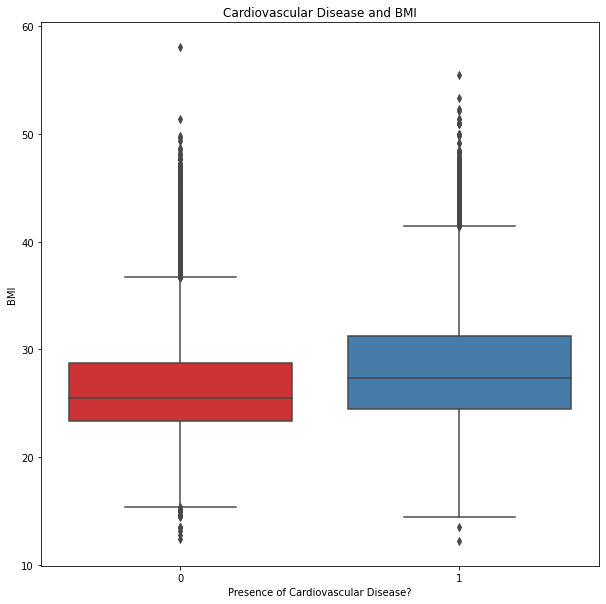

In [48]:
plt.figure(figsize=(10,10))

df_clean['bmi'] = df_clean['weight'] / (df_clean['height']/100)**2

sns.boxplot(x='cardio',
            y='bmi', 
            data=df_clean,
            palette="Set1").set(title = 'Cardiovascular Disease and BMI',
                               xlabel = 'Presence of Cardiovascular Disease?',
                               ylabel = 'BMI')

plt.show()

For entertainment, we can use some of what we learned in stats so that we don't forget, and do a ttest between the diseased and healthy group. It shows what would expect, that there is some statistical signficance in the mean difference of BMI between the two groups (healthy vs diseased).

In [49]:
from scipy import stats
import researchpy as rp

# Let's create 2 sets, one for disease, and another for healthy
disease = df_clean[df_clean['cardio'] == 1]
disease.reset_index(inplace = True)

healthy = df_clean[df_clean['cardio'] == 0]
disease.reset_index(inplace = True)

var='bmi'

# diff = disease[var] - healthy[var]
# stats.probplot(diff, plot= plt)
# plt.title('BMI P-P Plot') 
# stats.ttest_ind(disease[var], healthy[var]))

descriptives, results = rp.ttest(disease[var], healthy[var], equal_variances=False)
results

,Welch's t-test,results
0,Difference (bmi - bmi) =,1.8505
1,Degrees of freedom =,69185.9581
2,t =,51.2621
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,0.3876
7,Hedge's g =,0.3876
8,Glass's delta =,0.3686
9,r =,0.1913


We could also create a BMI category to represent the following four cases. [Source](https://www.cancer.org/cancer/cancer-causes/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html)

* Underweight: BMI is less than 18.5.
* Normal weight: BMI is 18.5 to 24.9.
* Overweight: BMI is 25 to 29.9.
* Obese: BMI is 30 or more.

As expected, we can see from that a higher BMI group correlates with a higher chance of being diagnosed with cardiovascular disease.


In [50]:
df_clean['bmiGrp'] = np.where((df_clean.bmi < 18.5), 1, 0)
df_clean['bmiGrp'] = np.where((df_clean.bmi >= 18.5) & (df_clean.bmi < 25), 2, df_clean.bmiGrp)
df_clean['bmiGrp'] = np.where((df_clean.bmi >= 25) & (df_clean.bmi < 30), 3, df_clean.bmiGrp)
df_clean['bmiGrp'] = np.where((df_clean.bmi >= 30), 4, df_clean.bmiGrp)

df_grouped = df_clean.groupby(by=['bmiGrp'])
print ("Percentage of Caridovascular Disease in each BMI group:")
print (df_grouped.cardio.sum() / df_grouped.cardio.count() *100)

Percentage of Caridovascular Disease in each BMI group:
bmiGrp
1    26.917058
2    40.545001
3    51.286476
4    62.745980
Name: cardio, dtype: float64


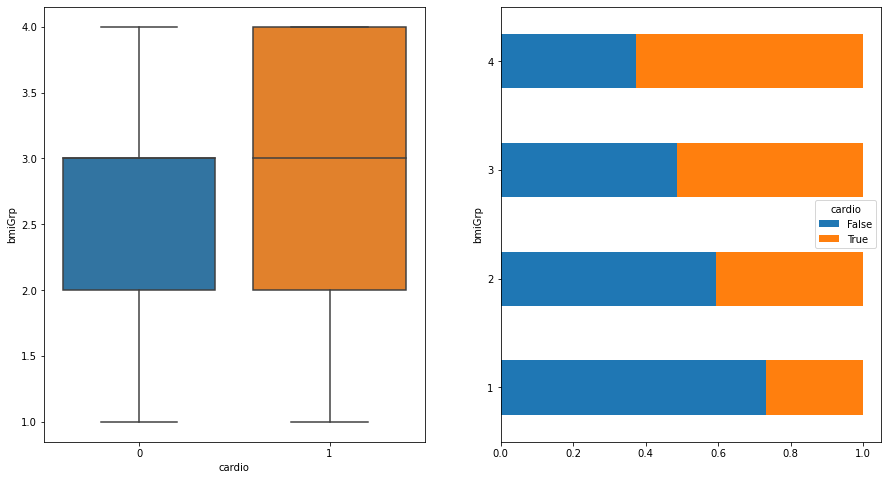

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(x='cardio', y='bmiGrp', data=df_clean, ax=ax1)
#sns.barplot(x='bp', y='cardio', data=df, ax=ax2)

cardio = pd.crosstab([df_clean['bmiGrp']],df_clean.cardio.astype(bool))
cardo_rate = cardio.div(cardio.sum(1).astype(float), axis=0) # normalize the value
cardo_rate.plot(kind='barh', stacked=True, ax=ax2)

plt.show()

## Blood Pressure Categories

We can also create a new feature to categorize the Blood Pressure values. [Source](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

<img src="https://www.heart.org/-/media/health-topics-images/hbp/blood-pressure-readings-chart-english.jpg"
     alt="Blood Pressure Categories"
     style="margin-right: 10px;" />

As with BMI Categories, we can see that a higher BP group corresponds to a higher chance of being diagnosed with cardiovascular disease.

In [52]:
# Create blood pressure categories

df_clean['bp'] = np.where((df_clean.ap_hi < 120) & (df_clean.ap_lo < 80), 1, 0)
df_clean['bp'] = np.where((df_clean.ap_hi >= 120) & (df_clean.ap_hi < 130) & (df_clean.ap_lo < 80), 2, df_clean.bp)
df_clean['bp'] = np.where((df_clean.ap_hi >= 130) & (df_clean.ap_hi < 140) | ((df_clean.ap_lo >= 80) & (df_clean.ap_lo < 90)), 3, df_clean.bp)
df_clean['bp'] = np.where((df_clean.ap_hi >= 140) | (df_clean.ap_lo >= 90), 4, df_clean.bp)
df_clean['bp'] = np.where((df_clean.ap_hi > 180) | (df_clean.ap_lo > 120), 5, df_clean.bp)

df_grouped = df_clean.groupby(by=['bp'])
print ("Percentage of cardio disease in each Blood Pressure group:")
print (df_grouped.cardio.sum() / df_grouped.cardio.count() *100)

Percentage of cardio disease in each Blood Pressure group:
bp
1    22.155939
2    32.253968
3    38.524389
4    78.158972
5    85.250000
Name: cardio, dtype: float64


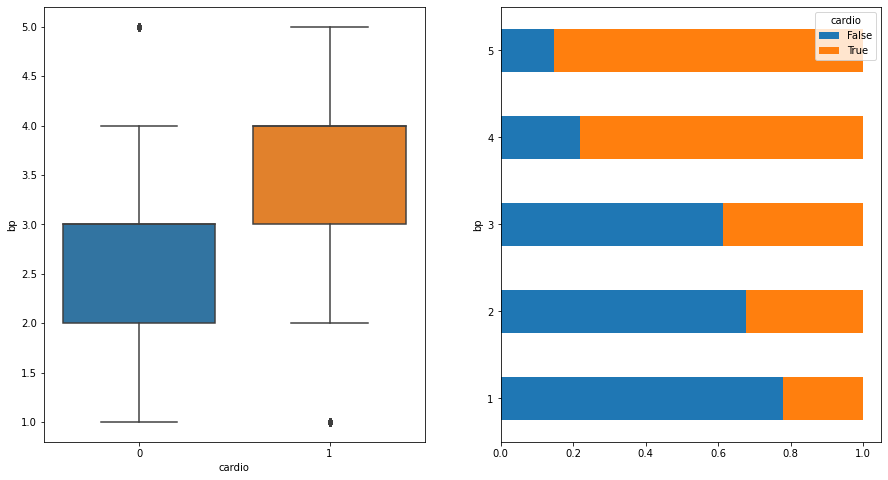

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(x='cardio', y='bp', data=df_clean, ax=ax1)
#sns.barplot(x='bp', y='cardio', data=df, ax=ax2)

cardio = pd.crosstab([df_clean['bp']],df_clean.cardio.astype(bool))
cardo_rate = cardio.div(cardio.sum(1).astype(float), axis=0) # normalize the value
cardo_rate.plot(kind='barh', stacked=True, ax=ax2)

plt.show()

Let's create a new feature correlation heatmap, but instead use the new features we created. In this case, we can see a better correlation between our groups for BMI and BP with respect to our reponse variable (cardio). Please note, we used a mask below to set correlations less than .2 to 0, for a better visualization.

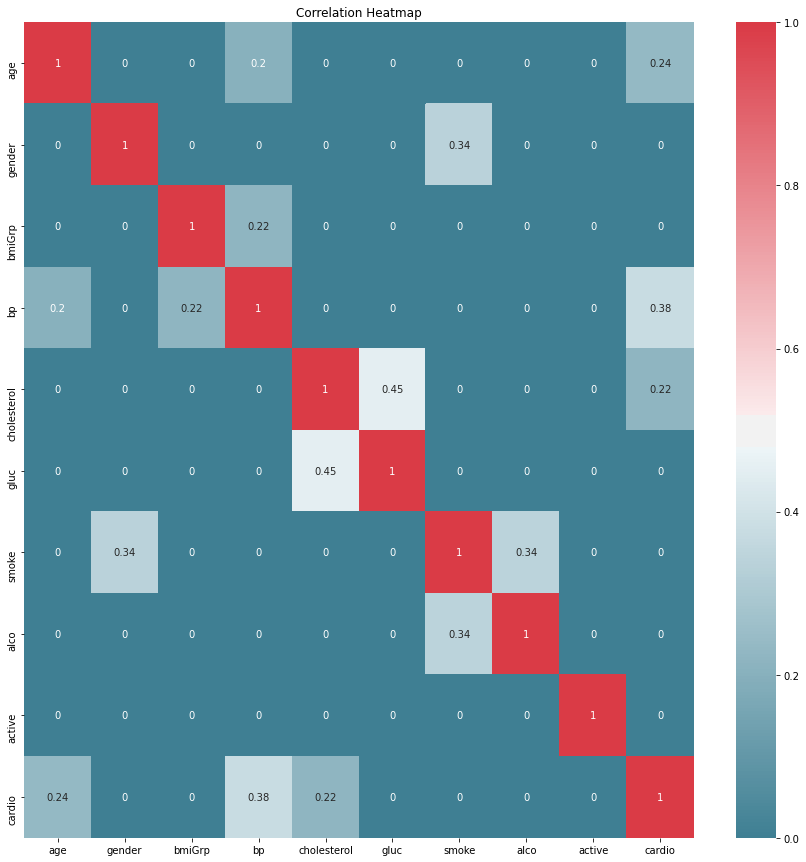

In [54]:
features = ['age', 'gender', 'bmiGrp', 'bp', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

plt.figure(figsize=(15,15))

# Use an easier to see colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlation = df_clean[features].corr()
correlation[np.abs(correlation)<.2] = 0

sns.heatmap(correlation, annot = True, cmap=cmap).set(title = 'Correlation Heatmap')
plt.show()

# Exceptional Work



#### Store feature matrix as an ndarray

In [55]:
# Full Model
#X_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# *dcrouthamel - test with new features
#X_cols = ['age', 'gender', 'bmiGrp', 'bp', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
X_cols = ['age', 'gender', 'bmi', 'bp', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
X = df_clean[X_cols].to_numpy()

In [56]:
type(X)

numpy.ndarray

#### Store response vector

In [57]:
y = df_clean['cardio'].to_numpy()

## Logistic Regression

Full Model consisting of all features with standardized values.


In [58]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = logreg.predict(X_test_std)
print('Accuracy of the log reg model on the test data: {:.2f}'.format(logreg.score(X_test_std, y_test)))

Accuracy of the log reg model on the test data: 0.71


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7345 3084]
 [2952 7612]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.71      0.70      0.71     10429
           1       0.71      0.72      0.72     10564

    accuracy                           0.71     20993
   macro avg       0.71      0.71      0.71     20993
weighted avg       0.71      0.71      0.71     20993



In [62]:
from IPython.display import Markdown as md

In [63]:
### Logistic Regression Metrics

md(f"**True Positives:**  {confusion_matrix[1, 1]} \n\n **True Negatives:**  {confusion_matrix[0, 0]} \n\n **False Positives:**  {confusion_matrix[0, 1]} \n\n **False Negatives:**  {confusion_matrix[1, 0]}")


**True Positives:**  7612 

 **True Negatives:**  7345 

 **False Positives:**  3084 

 **False Negatives:**  2952

In [64]:
md(f"**Accuracy:**  { format(( confusion_matrix[1, 1] + confusion_matrix[0, 0] ) / confusion_matrix.sum(), '.3f')}\n\n-how often we were correct overall")

**Accuracy:**  0.712

-how often we were correct overall

In [65]:
md(f"**Error:**  { format(( confusion_matrix[0, 1] + confusion_matrix[1, 0] ) / confusion_matrix.sum(), '.3f')}\n\n-how often we were incorrect overall")

**Error:**  0.288

-how often we were incorrect overall

In [66]:
md(f"**Sensitivity/ Recall:**  { format(( confusion_matrix[1, 1] ) / confusion_matrix[1].sum(axis=0), '.3f')}\n\n-when the patient actually had CVD, how often were we correct")

**Sensitivity/ Recall:**  0.721

-when the patient actually had CVD, how often were we correct

In [67]:
md(f"**Specificity:**  { format(( confusion_matrix[0, 0] ) / confusion_matrix[0].sum(), '.3f')}\n\n-when the patient did not had CVD, how often were we correct")

**Specificity:**  0.704

-when the patient did not had CVD, how often were we correct

In [68]:
md(f"**False Postive Rate:**  { format(( confusion_matrix[0, 1] ) / ( confusion_matrix[0, 0] + confusion_matrix[0, 1] ), '.3f')}\n\n-when the patient did not had CVD, how often were we incorrect")

**False Postive Rate:**  0.296

-when the patient did not had CVD, how often were we incorrect

In [69]:
md(f"**Precision:**  { format(( confusion_matrix[1, 1] ) / ( confusion_matrix[1, 1] + confusion_matrix[0, 1] ), '.3f')}\n\n-how precise were we when classifying the patient as having CVD")

**Precision:**  0.712

-how precise were we when classifying the patient as having CVD

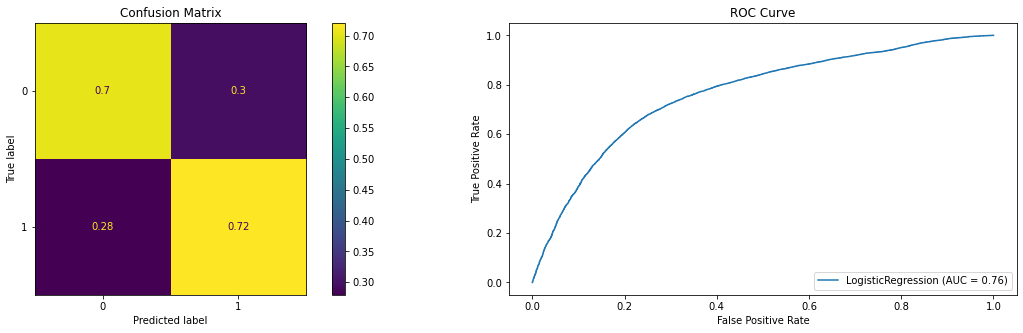

In [70]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

fig = plt.figure(1, figsize=(20, 5))

chart_1 = fig.add_subplot(121)
chart_2 = fig.add_subplot(122)

# Pass Fitted Model, and our test sets, see how they do
plot_confusion_matrix(logreg, X_test_std, y_test, normalize='true', ax=chart_1)
chart_1.set_title('Confusion Matrix')

plot_roc_curve(logreg, X_test_std, y_test, ax=chart_2)
chart_2.set_title('ROC Curve')

plt.show()

# New Stuff Begins Here


### Below, let's output the weights obtained from Logistic Regression.

[[ 0.36464609  0.01879864  0.20631572  0.79562796  0.36437927 -0.07184925
  -0.0310698  -0.04238403 -0.07454188]]


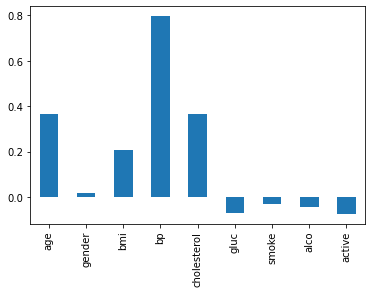

In [71]:
print(logreg.coef_)
weights = pd.Series(logreg.coef_[0],index=df_clean[X_cols].columns)
weights.plot(kind='bar')

# SVM

### Below is a quick run with SVC, note we didn't use a Standard scaler since we pass in X_train_std

In [72]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

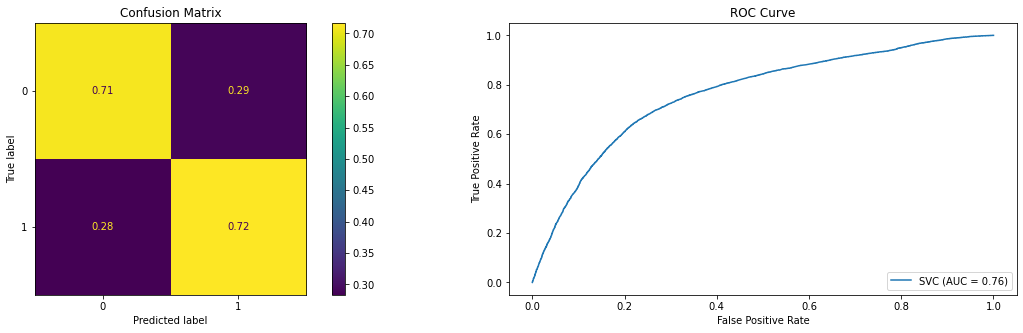

In [73]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

fig = plt.figure(1, figsize=(20, 5))

chart_1 = fig.add_subplot(121)
chart_2 = fig.add_subplot(122)

plot_confusion_matrix(svm, X_test_std, y_test, normalize='true', ax=chart_1)
chart_1.set_title('Confusion Matrix')

plot_roc_curve(svm, X_test_std, y_test, ax=chart_2)
chart_2.set_title('ROC Curve')

plt.show()

Above we see the performance is similar to logistic regression.

Below we output the support vector information. Our dataset had about 70K records, and below we see that we have about half that number in support vectors. Consistent with what was discussed in class, quoting Dr. Drew "Because the way support vector machines is designed it's only going to pick up, it's only going to make a support vector for either a zeta or slack variable or an instance a training record instance that falls right along the decision boundary. That's the only thing it needs to say to make its decision."

In [74]:
print(svm.support_vectors_.shape)
print(svm.support_.shape)
print(svm.n_support_ )

(34004, 9)
(34004,)
[17001 17003]


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.71      0.70      0.71     10429
           1       0.71      0.72      0.72     10564

    accuracy                           0.71     20993
   macro avg       0.71      0.71      0.71     20993
weighted avg       0.71      0.71      0.71     20993



### Below shows weights, but with no OneHot Encoding yet!!. Note, if we had used a non-linear kernal, we would not be able to see the weights here.

[[ 0.38467885  0.01235146  0.20945111  0.858827    0.33026837 -0.04333441
  -0.01620822 -0.03455547 -0.07671487]]


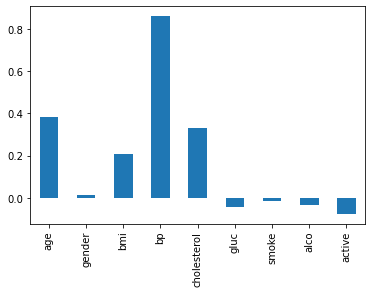

In [76]:
# Here was our X
#X_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# *dcrouthamel - test with new features
#X_cols = ['age', 'gender', 'bmiGrp', 'bp', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']


print(svm.coef_)
weights = pd.Series(svm.coef_[0],index=df_clean[X_cols].columns)
weights.plot(kind='bar')

The outpout above is consistent with Linear Regression, but still on One Hot Encoding.

## Go with Pipeline approach

The below tests 3 classifiers:
* Logistic Regression
* SGD (Stochastic Graident Descent)
* Full SVC

Note, the below (for the sake of time), has cv set to 2. Ideally, we should use 10.

In [77]:
#Chapter's 6 and 7 from Python Machine Learning are very helpful.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

X_cols = ['age', 'gender', 'bmi', 'bp', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
X = df_clean[X_cols]
y = df_clean['cardio'].to_numpy()

X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
    test_size=0.2,
    random_state=1,
    stratify=y)

# from sklearn.model_selection import StratifiedKFold
# kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

numeric_features = ['age', 'bmi', 'bp', 'cholesterol', 'gluc']
categorical_features = ['gender', 'smoke', 'alco', 'active']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf1 = LogisticRegression(penalty='l2',
                          C=0.001,
                          solver='lbfgs',
                          random_state=1)

# Hinge loss below gives a linear SVM.
clf2 = SGDClassifier(loss='hinge', penalty='l2', learning_rate='optimal')
clf3 = SVC(kernel='rbf', C=1.0, gamma='auto', random_state=1)

# clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
# clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')

pipe1 = Pipeline([['preprocessor', preprocessor], 
                 ['sc', StandardScaler()],
                 ['pca', PCA()],
                 ['clf', clf1]])

pipe2 = Pipeline([['preprocessor', preprocessor], 
                  ['sc', StandardScaler()],
                  ['pca', PCA()],
                  ['clf', clf2]])
                  
pipe3 = Pipeline([['preprocessor', preprocessor], 
                  ['sc', StandardScaler()],
                  ['pca', PCA()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'SVM', 'SVC']

# Note n_jobs below. Setting it to -1 will create cv number of threads
print('10-fold cross validation:\n')
for clf, label in zip([pipe1, pipe2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=2,
                             scoring='roc_auc',
                             n_jobs=-1)
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.77 (+/- 0.00) [Logistic regression]
ROC AUC: 0.76 (+/- 0.00) [SVM]
ROC AUC: 0.77 (+/- 0.00) [SVC]


# Grid Search

The below can be uncommented and do grid search. I'd like to set it up to do LR, SVM, and SVC, testing different Cs, kernels, gammas, etc.

In [78]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline

# X_cols = ['age', 'gender', 'bmiGrp', 'bp', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# X = df_clean[X_cols]
# y = df_clean['cardio'].to_numpy()

# X_train, X_test, y_train, y_test =\
#     train_test_split(X, y,
#     test_size=0.2,
#     random_state=1,
#     stratify=y)

# pipe_svc = make_pipeline(StandardScaler(),
#                         SVC(random_state=1))

# #param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
# param_range = [0.0001, 0.001, 0.01, 0.1, 1.0]

# param_grid = [{'svc__C': param_range,
#                 'svc__kernel': ['linear']},
#                {'svc__C': param_range,
#                 'svc__gamma': param_range,
#                 'svc__kernel': ['rbf']}]

# gs = GridSearchCV(estimator=pipe_svc,
#                    param_grid=param_grid,
#                    scoring='accuracy',
#                    cv=2,
#                    refit=True,
#                    n_jobs=-1)

# gs = gs.fit(X_train, y_train)
# print(gs.best_score_)
# print(gs.best_params_)


# Looking at weights when using OHE (One Hot Encoder)

In [79]:
#from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
#set_config(display='diagram')

# Full Model
# X_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# *dcrouthamel - test with new features
X_cols = ['age', 'gender', 'bmi', 'bp', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
#X = df_clean[X_cols].to_numpy()
X = df_clean[X_cols]

numeric_features = ['age','bmi','bp']
categorical_features = ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

svm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='linear', C=1.0, random_state=1))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svm.fit(X_train, y_train)
svm

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['age', 'bmi', 'bp']),
                                                 ('cat',
                                                  Pipeline(

### Below we see we have more features (because of OHE). Need to figure out how to include labels.

[[ 0.38607583  0.21003584  0.84607259 -0.01688269  0.01688269 -0.48702312
  -0.00734152  0.49436464  0.05698104  0.09615259 -0.15313363  0.0288705
  -0.0288705   0.07189906 -0.07189906  0.1028366  -0.1028366 ]]


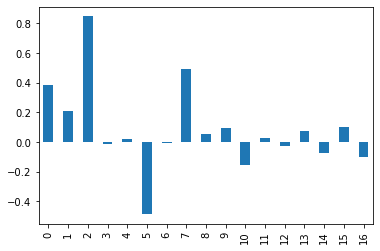

In [80]:

# We have more coefficients here because of interaction
print(svm['classifier'].coef_)
#weights = pd.Series(svm.coef_[0],index=df_clean.columns)
weights = pd.Series(svm['classifier'].coef_[0])
weights.plot(kind='bar')